## <center>LeNet</center>

### Theory

LeNet is the most popular CNN architecture it is also the first CNN model which came in the year 1998. LeNet was originally developed to categorise handwritten digits from 0–9 of the MNIST Dataset

[<img src="./images/LeNet1.webp" width="750" />](./images/LeNet1.webp )

- The First Convolutional Layer is made up of 6 5 X 5 filters with a stride of 1. So the <b>image height and width decreased by 4.</b>
- The Second Layer is a 2 X 2 average-pooling or "sub-sampling" layer with a stride of 2. So the <b>image height and width halfed.</b><br><br>
- The Third Layer is similarly a Convolutional layer, with 16 ,5 X 5 filters and a stride of 1. So the <b>image height and width decreased by 4</b>
- The Fourth Layer is another 2 X 2 average-pooling layer with a stride of 2. So the <b>image height and width halfed.</b><br><br>
- The fifth layer is basically connecting the output of the fourth layer with a fully connected layer consisting of 120 nodes.<br><br>
- The Sixth Layer is a similarly fully-connected layer with 84 nodes that derives from the outputs of the Fifth Layer's 120 nodes. <br><br>
- The seventh layer consists of categorising the output of the previous layer into ten classifications based on the 10-digits it was trained to identify.
<br>
<br>
- Input to this model is grayscale image
- Number of parameters than can be trained is 60000

### Code Implementation

In [1]:
from keras import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras import backend as K

In [2]:
class LeNet:
    # grayscale input
    def build(numChannels, imageHeight, imageWidth, numClasses, weightsPath=None, activation="relu"):
        model = Sequential()
        imageShape = (imageHeight, imageWidth, numChannels)
        
        # Layer 1
        model.add(Conv2D(6, (5, 5), input_shape=imageShape))
        model.add(Activation(activation=activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # Layer 2
        model.add(Conv2D(16, (5, 5)))
        model.add(Activation(activation=activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # Layer 3
        model.add(Flatten())
        
        # Layer 4
        model.add(Dense(120))
        model.add(Activation(activation=activation))
        
        # Layer 5
        model.add(Dense(84))
        model.add(Activation(activation=activation))
        
        # Layer 6
        model.add(Dense(numClasses))
        model.add(Activation(activation="softmax"))
        
        if weightsPath is not None:
            model.load_weights(weightsPath)
            
        return model
    

In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.utils import np_utils

%matplotlib inline

In [4]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [5]:
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)


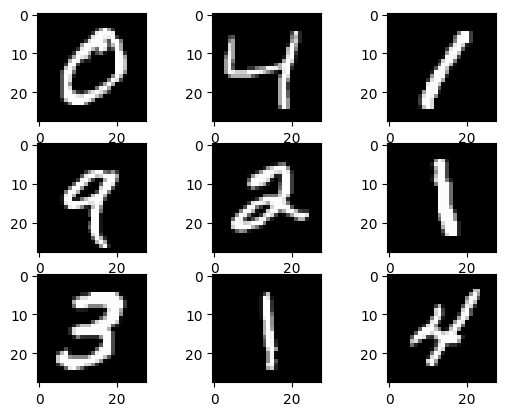

In [6]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(train_X[i], cmap="gray")
plt.show()

In [7]:
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))

train_X = train_X.astype("float32") / 255.0
test_X = test_X.astype("float32") / 255.0

train_Y = np_utils.to_categorical(train_Y, 10)
test_Y = np_utils.to_categorical(test_Y, 10)


optmzr = SGD(learning_rate=0.01)

model = LeNet.build(numChannels=1, imageHeight=28, imageWidth=28, numClasses=10)
model.compile(loss="categorical_crossentropy", optimizer=optmzr, metrics=["accuracy"])

model.fit(train_X, train_Y, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 1.3704 - accuracy: 0.5740
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.3265 - accuracy: 0.9013
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 0.2273 - accuracy: 0.9313
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1803 - accuracy: 0.9453
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1506 - accuracy: 0.9549
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1313 - accuracy: 0.9606
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1178 - accuracy: 0.9647
Epoch 8/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1057 - accuracy: 0.9682
Epoch 9/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0982 - accuracy: 0.9706
Epoch 10/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0918 - accura